# Introduction to Feature Engineering <font color='blue'></font>

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- numpy (aliased as np)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [1]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')

#### IMPORT THE NECESSARY PACKAGES WITH THEIR ALIASES ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### <font color='red'>0.2) Import the dataset from <i>'../data/my_data_after_simple_prep.csv'</i></font>

### <font color='red'>0.3) Print samples of data so you are familiar with the data </font>

## 1) Weekend, Weekday <font color='blue'> (20 min) </font>

### Weekday

### <font color='red'>1.1) Import the <i>calendar</i> package and get help on it </font>

In [4]:
#### IMPORT THE PACKAGE ####
import calendar

In [6]:
#### CALL HELP ON IT ####
help(calendar)

Help on module calendar:

NAME
    calendar - Calendar printing functions

MODULE REFERENCE
    https://docs.python.org/3.7/library/calendar
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    Note when comparing these calendars to the ones printed by cal(1): By
    default, these calendars have Monday as the first day of the week, and
    Sunday as the last (the European convention). Use setfirstweekday() to
    set the first day of the week (0=Monday, 6=Sunday).

CLASSES
    builtins.ValueError(builtins.Exception)
        IllegalMonthError
        IllegalWeekdayError
    builtins.object
        Calendar
            HTMLCalendar
                LocaleHTMLCalendar
            TextCalendar
            

### <font color='red'>1.2) Run the following block, so it changes starttime and stoptime columns of <i>data</i> to the right <i>datetime</i> format </font>

In [7]:
data['starttime'] = pd.to_datetime(data['starttime'], format="%Y-%m-%d %H:%M")
data['stoptime'] = pd.to_datetime(data['stoptime'], format="%Y-%m-%d %H:%M")

### <font color='red'>1.3) Run the following block with different day indexes, so you can see what <i>calendar.day_name[index_day]</i> returns </font>

In [8]:
index_day = range(0,7)
for i in index_day:
    print (i, calendar.day_name[i])

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### <font color='red'>1.4) Run the following block so you get the day index of a given observation, as well as its week-day using <i>calendar</i></font>

In [32]:
example_observation = data.iloc[0] #take the first row data
print(example_observation)
print("starttime:", example_observation.starttime)
print("starttime weekday index:", example_observation.starttime.weekday())
print("starttime weekday name:", calendar.day_name[example_observation.starttime.weekday()])

tripduration                                   1338
starttime                       2015-06-01 00:00:00
stoptime                        2015-06-01 00:22:00
start station id                                128
start station name         MacDougal St & Prince St
start station latitude                    40.727103
start station longitude                  -74.002971
end station id                                 2021
end station name                    W 45 St & 8 Ave
end station latitude                      40.759291
end station longitude                    -73.988597
bikeid                                        20721
usertype                                 Subscriber
birth year                                   1984.0
gender                                            1
Name: 0, dtype: object
starttime: 2015-06-01 00:00:00
starttime weekday index: 0
starttime weekday name: Monday


### <font color='red'>1.5) Create a column in the dataframe, containing the day of the week of a given trip. You can use the following functions:</font>
- pd.column_name.apply()
- calendar.day_name[day_number_here] (notice the brackets)
- datetime.weekday()

<font color='green'> <b>Any function can be passed to pd.column_name.apply(name_of_your_function), for instance you could use the <i>lambda functions</i></b>:
- new_column = pd.column_name.apply(lambda x: x.attribute_of_x) will create a new column, based on the attributes of elements of the old column.<font color='green'>

In [33]:
data['start_day'] = data.starttime.apply(lambda x: calendar.day_name[x.weekday()])
#### ADD THE DAY OF THE WEEK IN THIS NEW DATAFRAME COLUMN ####

### <font color='red'>1.6) Print samples of data to make sure the column has been created successfully </font>

In [36]:
col = ['starttime', 'start_day']
data[col].sample(2)

,starttime,start_day
151695,2015-06-07 00:14:00,Sunday
218155,2015-06-09 07:54:00,Tuesday


### <font color='red'>1.7) Use the <i>seaborn</i> package, and more specifically <i>sns.countplot</i>, to plot the number of trips per week day</font>

Text(0.5, 1.0, 'Number of Trips by Weekday')

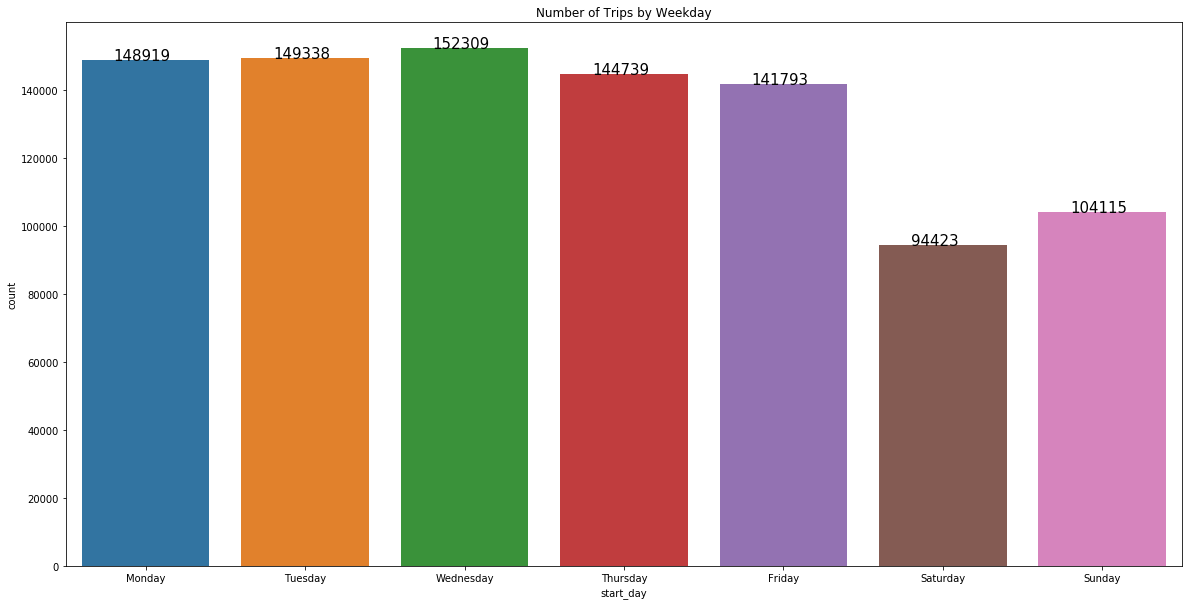

In [37]:
plt.figure(figsize=[20,10])
g = sns.countplot(data['start_day'])
for p in g.patches:
    g.text(p.get_x()+0.2, p.get_height()+1, '%i' % p.get_height(), size = 15) 
    
plt.title('Number of Trips by Weekday')

### <font color='red'>1.8) Define a new binary column, with True if day is on the weekend, False otherwise. You can use the <i>pandas.column_name.apply(your_function_here)</i> function.</font>

In [38]:
data['is_weekend'] = data.start_day.apply(lambda x: 1 if (x == 'Saturday' or x == 'Sunday') else 0)
##### NEW BINARY COLUMN, 1 IF OBSERVATION IS A WEEKEND TRIP, 0 OTHERWISE ####
                    #### YOU CAN USE A LAMBDA FUNCTION HERE like this : .apply(lambda x: x in set_to_check) ####

### <font color='red'>1.9) Plot samples of data to check success of operation</font>

In [39]:
col = ['start_day', 'is_weekend']
data[col].sample(5)

,start_day,is_weekend
202098,Monday,0
715015,Wednesday,0
386862,Saturday,1
802329,Friday,0
344461,Friday,0


## 2) Morning/afternoon/evening/night <font color='blue'> (15 min) </font>

### <font color='red'>2.1) Define a function that returns a string depending on its parameter x. If:</font>
- x.hour is strictly under 6 or strictly over 22, return 'night'
- x.hour is strictly over 18 and under 22, return 'evening'
- x.hour is strictly over 12 and under 18, return 'afternoon'
- otherwise return 'morning'

In [40]:
def time_of_day(x):
    if x.hour < 6 or x.hour >= 22:    #### COMPLETE THE FUNCTION BELOW ####
        return 'night'
    elif x.hour > 18 and x.hour < 22:
        return 'evening'
    elif x.hour >= 12 and x.hour <= 18:
        return 'afternoon'
    else:
        return 'morning'

### <font color='red'>2.2) Apply the function to the <i>starttime</i> column of <i>data</i> to create a new feature , using <i>pd.apply(your_function)</i> function</font>

In [41]:
data['start_moment'] = data.starttime.apply(time_of_day)
col = ['starttime', 'start_moment']
data[col].sample(5)
#### APPLY THE FUNCTION TO data.starttime IN ORDER TO CREATE A NEW FEATURE ####

,starttime,start_moment
688534,2015-06-23 13:21:00,afternoon
141516,2015-06-06 16:53:00,afternoon
114032,2015-06-05 17:09:00,afternoon
745667,2015-06-24 23:11:00,night
460959,2015-06-16 14:55:00,afternoon


### <font color='red'>2.3) Use <i>seaborn.countplot()</i> to plot the number of trips per moment of the day, with axes labels, and a title</font>

Text(0, 0.5, 'numberoftrips')

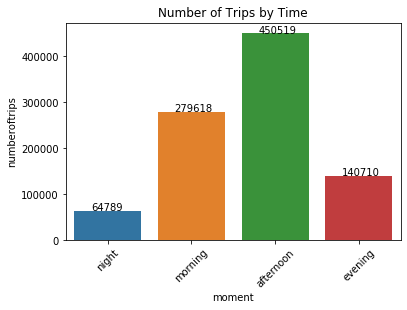

In [42]:
g = sns.countplot(data.start_moment)
for p in g.patches:
    g.text(p.get_x()+0.2, p.get_height()+1, '%i' % p.get_height(), size = 10)
g.set_xticklabels(g.xaxis.get_majorticklabels(), rotation=45)
plt.title('Number of Trips by Time')
plt.xlabel('moment')
plt.ylabel('numberoftrips')

### <font color='red'>2.4) Use <i>seaborn.countplot()</i> to plot the number of trips per weekday and per time of day</font>

Text(0, 0.5, 'numberoftrips')

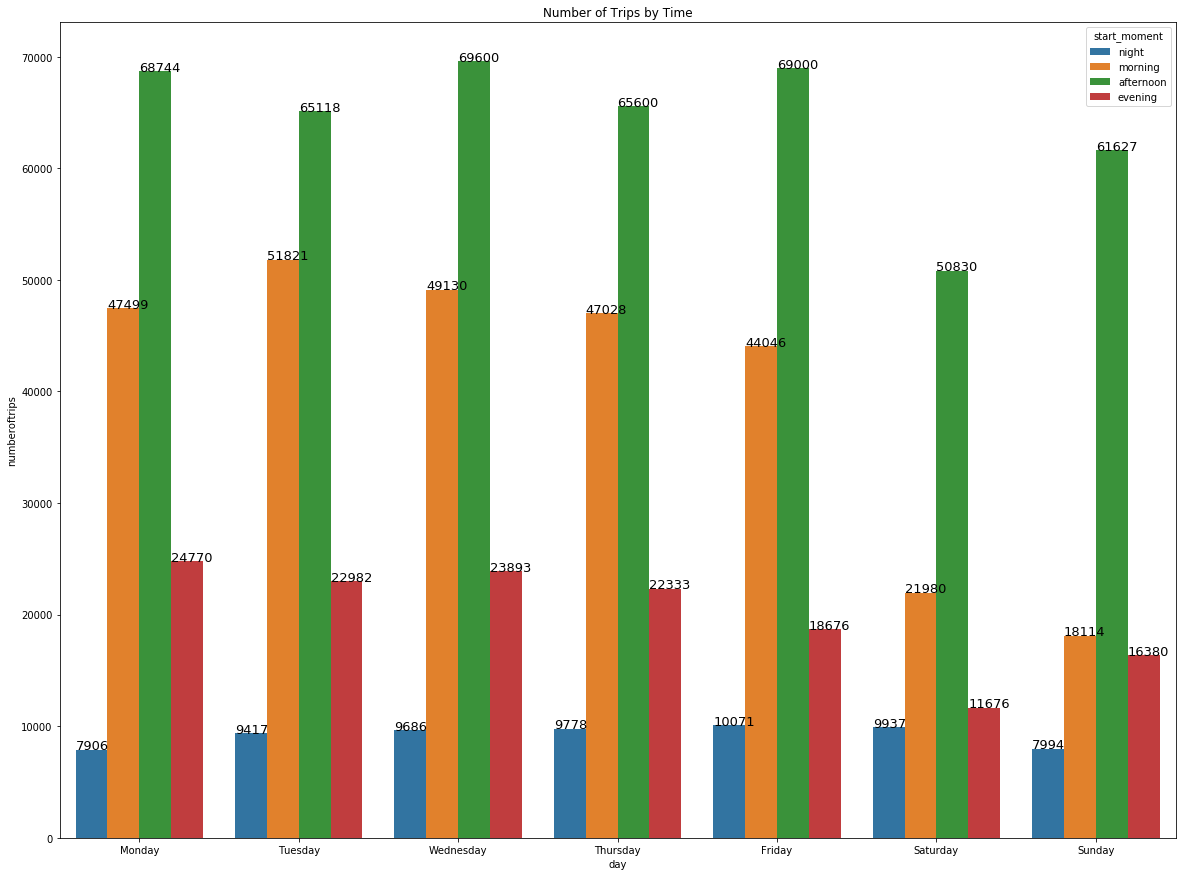

In [43]:
plt.figure(figsize=[20,15])
g = sns.countplot(data.start_day, hue=data.start_moment)
for p in g.patches:
    g.text(p.get_x()+0.0001, p.get_height()+1, '%i' % p.get_height(), size = 13)
plt.title('Number of Trips by Time')
plt.xlabel('day')
plt.ylabel('numberoftrips')

## 3) Is circle trip <font color='blue'> (5 min) </font>

### <font color='red'>3.1) Define a new binary column, with 1 if trip was loopy, 0 otherwise. You can use a boolean comparison of two columns of the dataframe:</font>

- example of boolean condition : <b>data.column_1 == data.column_2</b>

In [44]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,is_weekend,start_moment
896086,1386,2015-06-29 21:54:00,2015-06-29 22:17:00,3002,South End Ave & Liberty St,40.711512,-74.015756,146,Hudson St & Reade St,40.716250,-74.009106,15721,Customer,NaN,0,Monday,0,evening
917420,611,2015-06-30 15:42:00,2015-06-30 15:52:00,521,8 Ave & W 31 St,40.750967,-73.994442,444,Broadway & W 24 St,40.742354,-73.989151,19049,Customer,NaN,0,Tuesday,0,afternoon


In [45]:
data['is_circle_trip'] = data.apply(lambda x: 1 if x['start station id'] == x['end station id'] else 0, axis = 1)
#data['is_circle_trip'] = data['start station id'] == data['end station id']
#### USE A COMPARISON OF TWO COLUMNS OF THE DATAFRAME TO CHECK FOR A LOOP ####

### <font color='red'>3.2) Print the proportion of circle trips in the dataset</font>

In [46]:
data['is_circle_trip'].sum()/data['is_circle_trip'].count()

0.0217509800819977

## 4) Understanding trip evolution in June <font color='blue'> (15 min) </font>

### <font color='red'>4.1) Add a new column with the trip day number. Since all trips in the dataset occured in June, we will name this column "june_day". You can use the <i>datetime.day</i> attribute of the starttime</font>

In [47]:
data['june_day'] = data.starttime.apply(lambda x: x.day)
#### ADD A NEW FEATURE: THE DAY IN JUNE ####
                    #### HINT : use data.starttime.apply(your_lambda_function) #####

### <font color='red'>4.2) Group by the columns with respect to day in June, using <i>data.groupby()</i></font>

In [48]:
grouped_by_data = data.groupby(data['june_day'],as_index = False)
#### GROUP THE DATA BY JUNE DAY ####
df = grouped_by_data.aggregate({'tripduration': pd.Series.count, 'start station id': pd.Series.nunique})
df.columns = ['june_day', 'numberoftrips', 'uniqueStartstationid']
print(df.head())

   june_day  numberoftrips  uniqueStartstationid
0         1          15256                   318
1         2          11962                   318
2         3          34422                   319
3         4          32659                   319
4         5          31186                   319


### <font color='red'>4.3) Aggregate the grouped by data with respect to mean weekend, and number of trips, using the <i>.count()</i> and <i>.mean()</i> methods of <i>data.groupby()</i></font>

In [50]:
aggregate_count_trips = grouped_by_data.count()
aggregate_weekend = grouped_by_data.mean()

### <font color='red'>4.4) Understand what the code below does. How do you understand the plots ? You can look up the following functions:</font>
- fig, ax1 = plt.subplots()
- ax2=ax1.twinx()
- ax1.plot(), ax2.plot()
- any other options to set the ticks labels, colors, titles ...

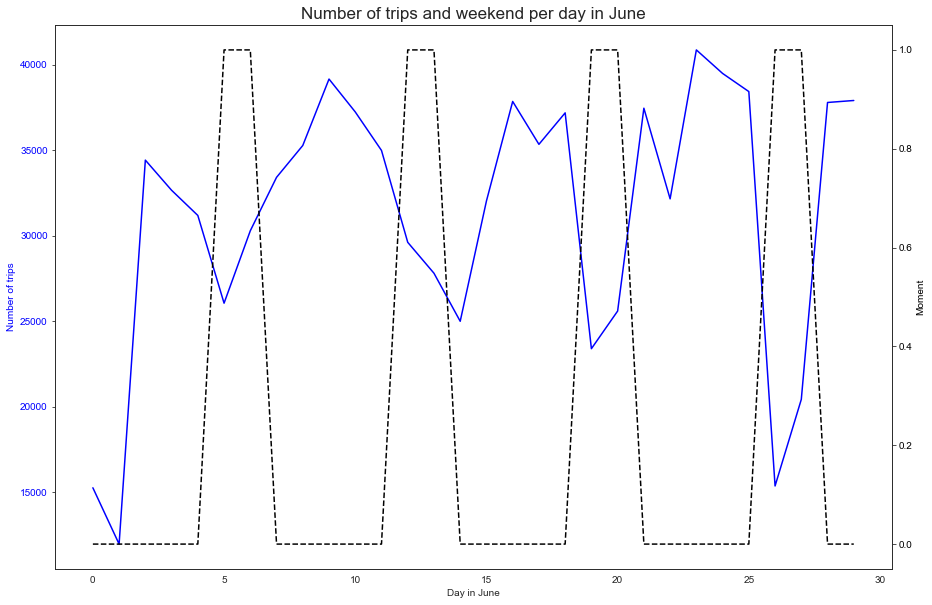

In [51]:
sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(15,10))

june_day = aggregate_count_trips.index

number_trips = aggregate_count_trips.tripduration
ax1.plot(june_day, number_trips, 'b')
ax1.set_xlabel('Day in June')
for ticklabel in ax1.get_yticklabels():
    ticklabel.set_color('b')
ax1.set_ylabel('Number of trips',color='b')

ax2 = ax1.twinx() #add another axis
weekend = aggregate_weekend.is_weekend
ax2.plot(june_day, weekend, 'k--')
for ticklabel in ax2.get_yticklabels():
    ticklabel.set_color('k')
ax2.set_ylabel('Moment',color='k')
plt.title('Number of trips and weekend per day in June', fontsize=17)
plt.show()

#start_moment

## 5) Trip distances and speeds <font color='blue'> (15 min) </font>

### <font color='red'>Import the haversine package, that computes the haversine distance from one coordinate to another</font>

In [52]:
from haversine import haversine

### <font color='red'>Understand how the <i>haversine</i> function from the package can be used to compute a distance by running the following blocks</font>

In [53]:
x = data.iloc[0]

In [54]:
print('Traveled haversine distance for trip 0: {:.1f} kilometers'.format(
    haversine((x['start station latitude'], x['start station longitude']),
              (x['end station latitude'], x['end station longitude']))))#,miles=True))
#by default, it will give result in kilometers. we can change it to miles by adding miles=True in the hyperparameter

Traveled haversine distance for trip 0: 3.8 kilometers


### <font color='red'>5.1) Complete the following function so it returns, for a given observation, the haversine distance from a start station to the end station</font>

In [55]:
def distance_stations(x):
    start_lat = x['start station latitude']
    start_long = x['start station longitude']
    end_lat = x['end station latitude']
    end_long = x['end station longitude']
    return haversine((start_lat,start_long),(end_lat,end_long))
#### COMPLETE THE FUNCTION SO IT RETURNS THE DISTANCE FROM START TO END ####

### <font color='red'>5.2) What does the following block do ? It may take a minute or two to run</font>

### <font color='red'>5.3) Show <i>samples</i> of data, and see how the traveled distance has been added as a new feature in the dataset</font>

### <font color='red'>5.4) Compute the average speed (in km/h) by dividing two dataframe columns</font>

In [58]:
data['average_speed'] = data.apply(lambda x: x['traveled_distance']/(x['tripduration']/3600), axis=1)
col = ['traveled_distance', 'tripduration', 'average_speed']
data[col].sample(5)
#### COMPUTE THE AVERAGE SPEED HERE ####

,traveled_distance,tripduration,average_speed
676035,1.105331,427,9.318952
505304,2.487707,888,10.085298
611980,2.406766,945,9.168632
188863,0.907567,360,9.075665
66500,2.166169,849,9.185167


### <font color='red'>Run the following block to compute the mean speed on non-loopy trips </font>

In [59]:
mean_speed = mean(data['average_speed'][data['average_speed'] != 0])

### <font color='red'>5.5) Keep only trips for which the speed is under 50 km/h </font>

In [60]:
data = data[data['average_speed'] < 50]
    
    #### ENTER YOUR FILTERING CONDITION HERE ####
            #### WARNING : THIS WILL ERASE THE RAW DATA SO MAKE SURE IT IS CORRECT! ####
            #### MAKE TESTS ON THE SLICING CONDITION BEFORE ERASING THE DATA ####]

### <font color='red'>What does the following block do ?</font>

In [61]:
data.loc[data['average_speed']==0,'average_speed'] = mean_speed

### <font color='red'>5.6) Using <i>seaborn.distplot</i>, plot the distribution of speeds</font>

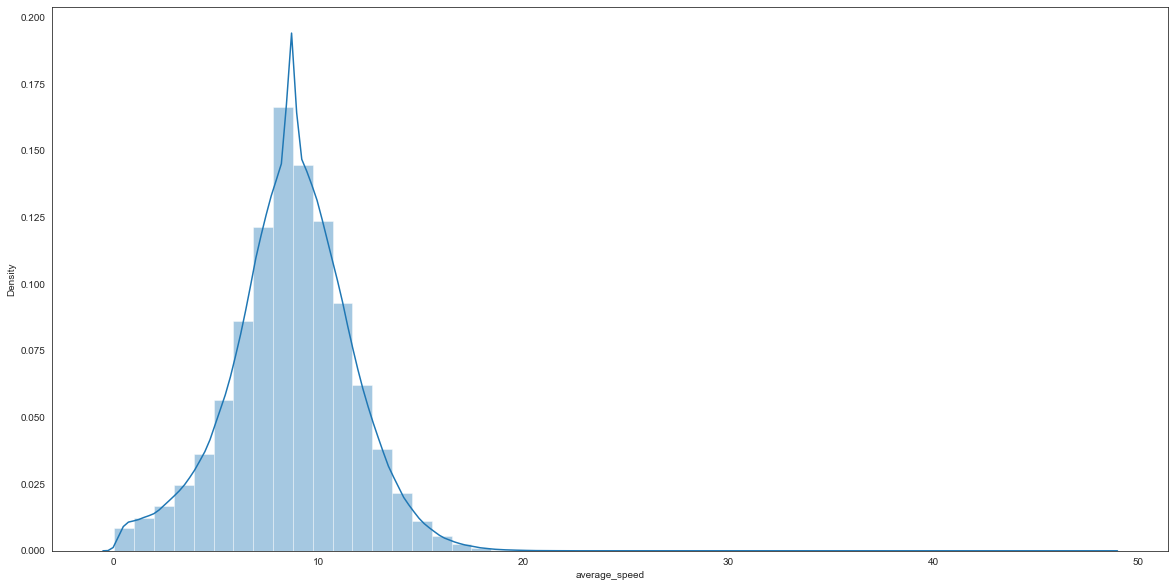

In [62]:
plt.figure(figsize=(20,10))
sns.distplot(data['average_speed'])
#### PLOT THE DISTRIBUTION OF SPEEDS ####
plt.show()

### <font color='red'>5.7) Subsidiary question : plot the average speed vs. the total distance. What do you observe ? You can use the following function: </font>
- seaborn.regplot()
- data_sample = data.sample(1000) so as not to overload the graph

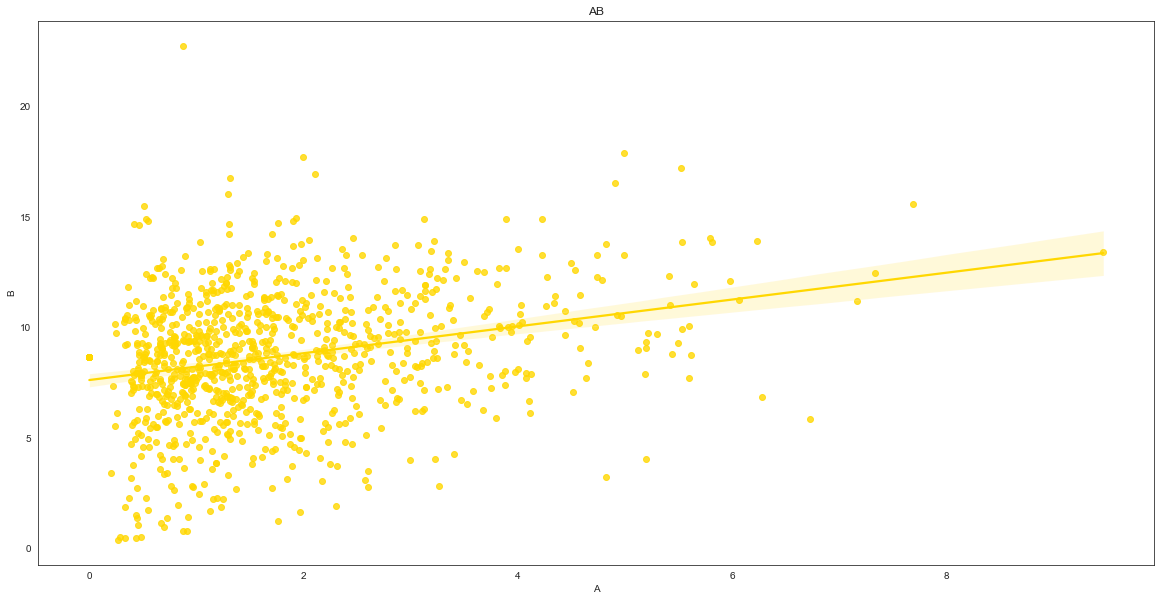

In [63]:
data_sample = data.sample(1000)
plt.figure(figsize=[20,10])
sns.regplot(x = 'traveled_distance', y = 'average_speed', data=data_sample, color = 'gold')
sns.set(rc={'axes.facecolor':'cornflowerblue'})#, 'figure.facecolor':'cornflowerblue'})
plt.xlabel('A')
plt.ylabel('B')
plt.title('AB')
plt.show()

# Save dataset to csv file

## 2) Exercise <font color='blue'> (10 min) </font>

### <font color='red'>2.1) Any other interesting features that we need to create to enrich the data?</font>